# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create different lists for finding proper values from API call
lat=[]
lon=[]
temp_max=[]
humidity=[]
wind=[]
country=[]
city_id=[]
city_name=[]
cloudiness=[]
dat=[]

#Create string for API call for all of cities found from citipy
url=f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"
counter=1
print("Beginning Data Retrieval")
print("-----------------------------")
#for each city in cities list, create url for API call,if city found, retrieve proper filed from API and save in list
for c in cities:
    query_url=f"{url}&q={c}"
    response=requests.get(query_url).json()
    #consider successful API call
    if (response["cod"]==200):
        print(f"Processing Record {counter} of set 1 | {c}")
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        temp_max.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        dat.append(response["dt"])
        city_id.append(counter)
        counter+=1
    else:
        #If can not find city in cities print proper message
        print(f"{c} NOT FOUND. Skipping.... !!!!")
    time.sleep(4)
print("--------------------------------------------------")
print("Data Retrieval Complete")
print(f"Successful API call for {counter-1} cities")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | airai
Processing Record 2 of set 1 | iraquara
Processing Record 3 of set 1 | rikitea
Processing Record 4 of set 1 | albany
Processing Record 5 of set 1 | salcininkai
Processing Record 6 of set 1 | cape town
Processing Record 7 of set 1 | puerto carreno
Processing Record 8 of set 1 | avarua
Processing Record 9 of set 1 | punta arenas
Processing Record 10 of set 1 | tilichiki
Processing Record 11 of set 1 | mar del plata
taolanaro NOT FOUND. Skipping.... !!!!
Processing Record 12 of set 1 | rafsanjan
Processing Record 13 of set 1 | hilo
Processing Record 14 of set 1 | ostrovnoy
Processing Record 15 of set 1 | vaini
Processing Record 16 of set 1 | terney
Processing Record 17 of set 1 | talnakh
Processing Record 18 of set 1 | hermanus
attawapiskat NOT FOUND. Skipping.... !!!!
Processing Record 19 of set 1 | mataura
Processing Record 20 of set 1 | alugan
Processing Record 21 of set 1 | busselton
Processing

Processing Record 181 of set 1 | thompson
Processing Record 182 of set 1 | nikolskoye
Processing Record 183 of set 1 | yarmouth
Processing Record 184 of set 1 | dhidhdhoo
Processing Record 185 of set 1 | turayf
Processing Record 186 of set 1 | chapais
Processing Record 187 of set 1 | keighley
barawe NOT FOUND. Skipping.... !!!!
Processing Record 188 of set 1 | hirara
Processing Record 189 of set 1 | bathsheba
Processing Record 190 of set 1 | agadez
Processing Record 191 of set 1 | katobu
Processing Record 192 of set 1 | saint anthony
Processing Record 193 of set 1 | florence
Processing Record 194 of set 1 | bilma
Processing Record 195 of set 1 | olafsvik
Processing Record 196 of set 1 | salta
Processing Record 197 of set 1 | cherskiy
Processing Record 198 of set 1 | salalah
Processing Record 199 of set 1 | longyearbyen
sumbawa NOT FOUND. Skipping.... !!!!
Processing Record 200 of set 1 | half moon bay
Processing Record 201 of set 1 | idrinskoye
Processing Record 202 of set 1 | constitu

Processing Record 364 of set 1 | wladyslawowo
Processing Record 365 of set 1 | catio
sinkat NOT FOUND. Skipping.... !!!!
Processing Record 366 of set 1 | vasterhaninge
Processing Record 367 of set 1 | millinocket
Processing Record 368 of set 1 | bonavista
Processing Record 369 of set 1 | barisal
Processing Record 370 of set 1 | shahrud
Processing Record 371 of set 1 | tuatapere
Processing Record 372 of set 1 | lakatoro
Processing Record 373 of set 1 | vao
Processing Record 374 of set 1 | zhigansk
Processing Record 375 of set 1 | sompeta
Processing Record 376 of set 1 | puerto el triunfo
Processing Record 377 of set 1 | tautira
Processing Record 378 of set 1 | limbang
Processing Record 379 of set 1 | nioro
Processing Record 380 of set 1 | muriwai beach
Processing Record 381 of set 1 | sfantu gheorghe
Processing Record 382 of set 1 | valleyview
Processing Record 383 of set 1 | nazare
Processing Record 384 of set 1 | alofi
Processing Record 385 of set 1 | port hawkesbury
Processing Record

Processing Record 543 of set 1 | vardo
Processing Record 544 of set 1 | ola
Processing Record 545 of set 1 | ishigaki
Processing Record 546 of set 1 | mana
Processing Record 547 of set 1 | svetlogorsk
Processing Record 548 of set 1 | oksovskiy
Processing Record 549 of set 1 | caaguazu
Processing Record 550 of set 1 | neiafu
Processing Record 551 of set 1 | seydi
Processing Record 552 of set 1 | alice springs
Processing Record 553 of set 1 | iberia
Processing Record 554 of set 1 | komsomolskiy
Processing Record 555 of set 1 | fayaoue
Processing Record 556 of set 1 | navalcarnero
Processing Record 557 of set 1 | solana beach
Processing Record 558 of set 1 | pacific grove
Processing Record 559 of set 1 | luanda
Processing Record 560 of set 1 | gao
Processing Record 561 of set 1 | balkhash
Processing Record 562 of set 1 | high level
Processing Record 563 of set 1 | mabaruma
Processing Record 564 of set 1 | tocopilla
Processing Record 565 of set 1 | damietta
Processing Record 566 of set 1 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create Data Frame and show number of rows
weather_data=pd.DataFrame({"Id":city_id, "City":city_name, "Lat":lat, "Lng":lon, "Max Temp":temp_max,
    "Humidity":humidity, "Cloudiness":cloudiness, "Wind Speed":wind, "Country":country, "Date":dat})
print(weather_data.count())

Id            570
City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64


In [5]:
#Convert Data frame to csv file and show data frame
weather_data.to_csv(output_data_file,encoding='utf_8',index=False)
weather_data.head()

,Id,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,Airai,-8.9266,125.4092,73.89,83,100,1.25,TL,1610161726
1,2,Iraquara,-12.2486,-41.6194,69.46,68,0,3.13,BR,1610161731
2,3,Rikitea,-23.1203,-134.9692,78.80,75,70,11.03,PF,1610161735
3,4,Albany,42.6001,-73.9662,19.99,74,4,7.61,US,1610161739
4,5,Šalčininkai,54.3000,25.3833,27.00,93,90,3.44,LT,1610161743


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#find maximum of humidity and create new data frame from it and claculate related statistics
max=weather_data["Humidity"].max()
print(f"Maximum of humidity in data frame is: {max}")
#clean rows of data frame which has humidity more than 100
if max>100:
    clean_data=weather_data.loc[weather_data["Humidity"]<= 100]
    clean_data.describe()
weather_data.describe()

Maximum of humidity in data frame is: 100


,Id,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,285.500000,20.208385,19.290970,48.069175,75.092982,52.861404,7.170281,1.610163e+09
std,164.689101,33.578744,88.987206,31.577404,18.864239,40.064580,5.350290,7.448993e+02
min,1.000000,-54.800000,-175.200000,-37.530000,16.000000,0.000000,0.290000,1.610162e+09
25%,143.250000,-7.237500,-58.760450,26.600000,66.250000,5.500000,3.440000,1.610162e+09
50%,285.500000,23.863350,25.425000,57.235000,79.000000,65.500000,5.750000,1.610163e+09
75%,427.750000,48.358200,95.182725,75.200000,89.000000,91.000000,9.220000,1.610164e+09
max,570.000000,78.218600,179.316700,99.010000,100.000000,100.000000,39.880000,1.610164e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
wrong_data=weather_data.loc[weather_data["Humidity"]>100]
indices=[]
indices=wrong_data["Id"].index
indices

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data.drop(indices, inplace=False)

In [10]:
#print weather clean data
clean_city_data
clean_city_data["Id"].count()

570

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

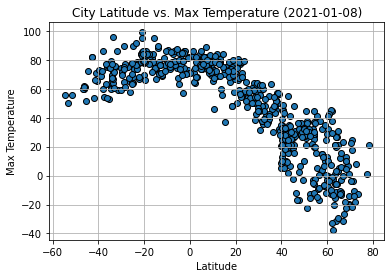

In [11]:
ax = plt.subplots()
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], edgecolors="black")
t=f"City Latitude vs. Max Temperature ({date.today()})"
plt.title(t)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
plt.savefig("output_data/Lat_vs_Temp.png")
plt.show()

## Latitude vs. Humidity Plot

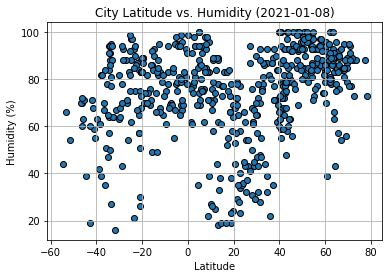

In [12]:
ax = plt.subplots()
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], edgecolors="black")
t=f"City Latitude vs. Humidity ({date.today()})"
plt.title(t)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

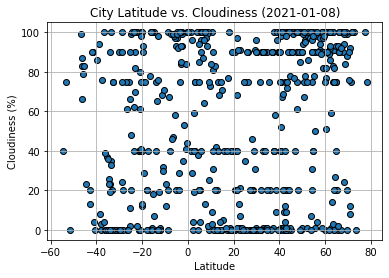

In [13]:
ax = plt.subplots()
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], edgecolors="black")
t=f"City Latitude vs. Cloudiness ({date.today()})"
plt.title(t)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Lat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

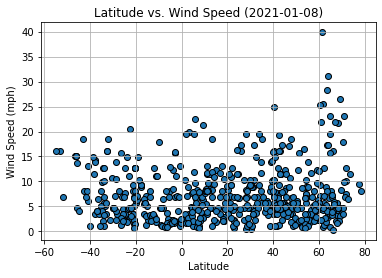

In [14]:
ax = plt.subplots()
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], edgecolors="black")
t=f"Latitude vs. Wind Speed ({date.today()})"
plt.title(t)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/Lat_vs_Wind_Speed.png")
plt.show()

## Linear Regression

In [15]:
#create function for make linear regression for next steps
def linear_reg(x, y, y_label, filen,xy):
    slope, intercept, r_value, p_value, std_err=st.linregress(x,y)
    regression_value=x*slope+intercept
    plt.scatter(x, y)
    plt.plot(x, regression_value, color='red')
    line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
    plt.annotate(line_eq, xy, color='red', fontsize=14)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value}")
    path="output_data/"+filen
    plt.savefig(path)
    plt.show()

#create separate data frames for north and south heisphere    
northern_hemisphere=clean_city_data.loc[clean_city_data["Lat"]> 0]
southern_hemisphere=clean_city_data.loc[clean_city_data["Lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8816184621143498


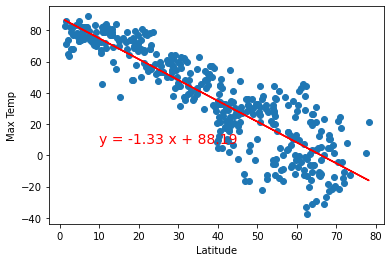

In [16]:
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], "Max Temp", "Linear_Lat_vs_Temp_north_Hemispher.png",(10,8))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.47254511929233733


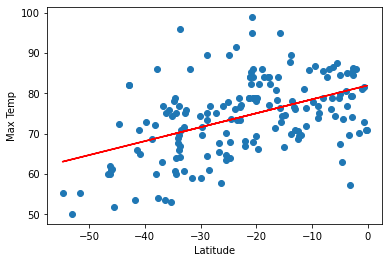

In [17]:
linear_reg(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"], "Max Temp", "Linear_Lat_vs_Temp_south_Hemispher.png",(-40,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.36693343918962656


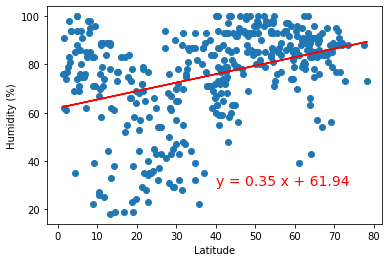

In [18]:
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Humidity"], "Humidity (%)", "Linear_Lat_vs_Humidity_north_Hemispher.png",(40,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3494955511148425


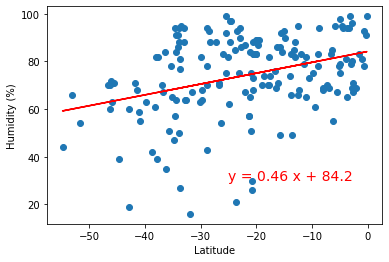

In [19]:
linear_reg(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], "Humidity (%)", "Linear_Lat_vs_Humidity_south_Hemispher.png",(-25,30))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.26951585959054425


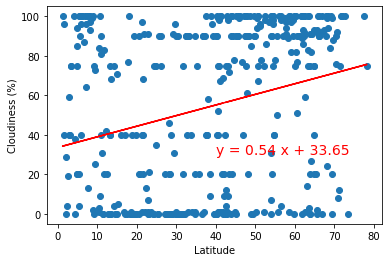

In [20]:
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], "Cloudiness (%)", "Linear_Lat_vs_Cloudiness_north_Hemispher.png",(40,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2286190973054651


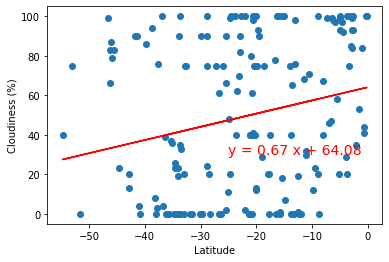

In [21]:
linear_reg(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], "Cloudiness (%)", "Linear_Lat_vs_Cloudiness_south_Hemispher.png",(-25,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08180316871832242


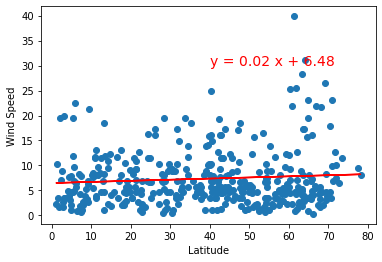

In [22]:
linear_reg(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], "Wind Speed", "Linear_Lat_vs_Wind_north_Hemispher.png",(40,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.28605943476374446


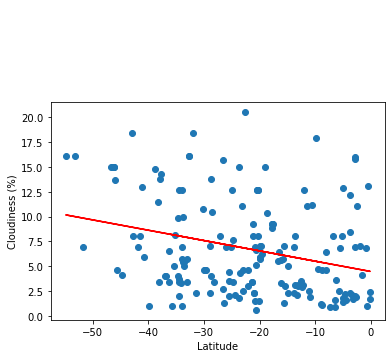

In [23]:
linear_reg(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], "Cloudiness (%)", "Linear_Lat_vs_Wind_south_Hemispher.png",(-25,30))